In [13]:
import pandas as pd 
import datetime 
df = pd.read_csv("table71_eng.csv")
df.head(10)

,YR_MTH,SOA_FATAL,SOA_FATAL_INDI,SOA_SERIOUS,SOA_SERIOUS_INDI,SOA_SLIGHT,SOA_SLIGHT_INDI,VCT_VEHICLE,VCT_VEHICLE_INDI,VCT_PDS,VCT_PDS_INDI,VCT_OBJ,VCT_OBJ_INDI,VCT_NONCOL,VCT_NONCOL_INDI
0,201301,7,NaN,228,NaN,1108,NaN,532,NaN,287,NaN,136,NaN,388,NaN
1,201302,6,NaN,192,NaN,953,NaN,457,NaN,222,NaN,115,NaN,357,NaN
2,201303,9,NaN,202,NaN,1085,NaN,513,NaN,277,NaN,129,NaN,377,NaN
3,201304,8,NaN,198,NaN,1041,NaN,482,NaN,260,NaN,152,NaN,353,NaN
4,201305,10,NaN,187,NaN,1142,NaN,527,NaN,300,NaN,134,NaN,378,NaN
5,201306,8,NaN,228,NaN,1194,NaN,605,NaN,299,NaN,141,NaN,385,NaN
6,201307,14,NaN,219,NaN,1192,NaN,606,NaN,285,NaN,180,NaN,354,NaN
7,201308,12,NaN,213,NaN,1118,NaN,594,NaN,255,NaN,214,NaN,280,NaN
8,201309,13,NaN,218,NaN,1160,NaN,568,NaN,298,NaN,162,NaN,363,NaN
9,201310,14,NaN,212,NaN,1138,NaN,505,NaN,288,NaN,234,NaN,337,NaN


In [14]:
#remove data of 2024
df = df[~df['YR_MTH'].astype(str).str.startswith('2024')].reset_index(drop=True) 

#drop column with null value
df.dropna(axis = 1, inplace = True) 

#rename all columns
df = df.rename(columns={'SOA_FATAL': 'Fatality', 'SOA_SERIOUS': 'Serious', 'SOA_SLIGHT': 'Slight', 'VCT_VEHICLE': 'Vehicle', 'VCT_PDS': 'Pedestrian', 'VCT_OBJ': 'Object', 'VCT_NONCOL': 'Non collision'})

# Create "Year" and "Month" columns
df['Year'] = df['YR_MTH'] // 100
df['Month'] = df['YR_MTH'] % 100

# Remove the original "YR_MTH" column
df.drop("YR_MTH", axis=1, inplace=True)

#Count total accident based on each row which affects in each month of a year
df['Total accident'] = (df.iloc[:,0:7]).sum(axis = 1)
#make a copy
df_final = df.copy()

# Print the updated DataFrame
df_final.head()

,Fatality,Serious,Slight,Vehicle,Pedestrian,Object,Non collision,Year,Month,Total accident
0,7,228,1108,532,287,136,388,2013,1,2686
1,6,192,953,457,222,115,357,2013,2,2302
2,9,202,1085,513,277,129,377,2013,3,2592
3,8,198,1041,482,260,152,353,2013,4,2494
4,10,187,1142,527,300,134,378,2013,5,2678


In [446]:
df_final.isnull().sum()

Fatality          0
Serious           0
Slight            0
Vehicle           0
Pedestrian        0
Object            0
Non collision     0
Year              0
Month             0
Total accident    0
dtype: int64

In [447]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Fatality        132 non-null    int64
 1   Serious         132 non-null    int64
 2   Slight          132 non-null    int64
 3   Vehicle         132 non-null    int64
 4   Pedestrian      132 non-null    int64
 5   Object          132 non-null    int64
 6   Non collision   132 non-null    int64
 7   Year            132 non-null    int64
 8   Month           132 non-null    int64
 9   Total accident  132 non-null    int64
dtypes: int64(10)
memory usage: 10.4 KB


In [448]:
df_final.describe()

,Fatality,Serious,Slight,Vehicle,Pedestrian,Object,Non collision,Year,Month,Total accident
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,8.833333,160.893939,1173.719697,660.984848,237.916667,80.924242,363.621212,2018.000000,6.500000,2686.893939
std,3.174725,48.249393,128.426729,108.321051,40.372132,34.711377,46.284967,3.174324,3.465203,247.256496
min,2.000000,37.000000,753.000000,415.000000,111.000000,41.000000,212.000000,2013.000000,1.000000,1666.000000
25%,7.000000,123.750000,1112.000000,589.250000,211.750000,62.750000,336.750000,2015.000000,3.750000,2604.000000
50%,9.000000,171.500000,1173.500000,654.500000,243.000000,73.500000,361.500000,2018.000000,6.500000,2712.000000
75%,11.000000,196.500000,1240.000000,737.250000,267.000000,85.000000,393.000000,2021.000000,9.250000,2835.000000
max,23.000000,245.000000,1464.000000,894.000000,315.000000,255.000000,468.000000,2023.000000,12.000000,3182.000000


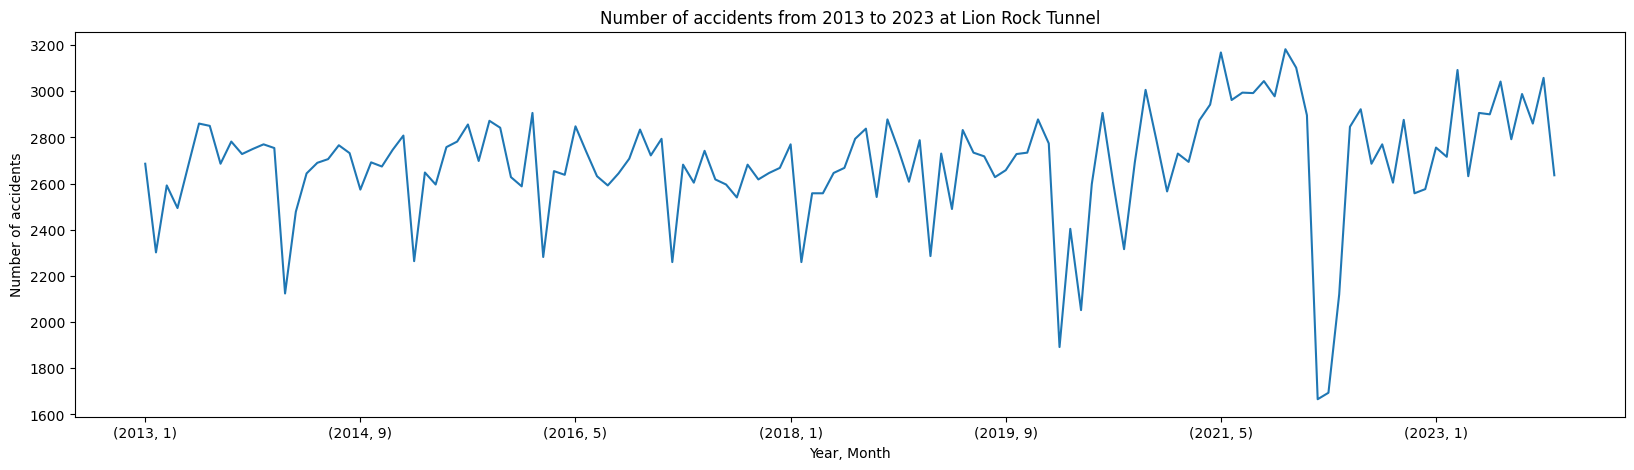

In [450]:
import matplotlib.pyplot as plt

# Grouping by 'Year' and 'Month' and calculating the sum of 'Total accident'
df_final = df_final.groupby(['Year','Month'])['Total accident'].sum()
df_final.plot(kind='line', title='Number of accidents from 2013 to 2023 at Lion Rock Tunnel', figsize=(20, 5))
plt.xlabel('Year, Month')
plt.ylabel('Number of accidents')
plt.show()

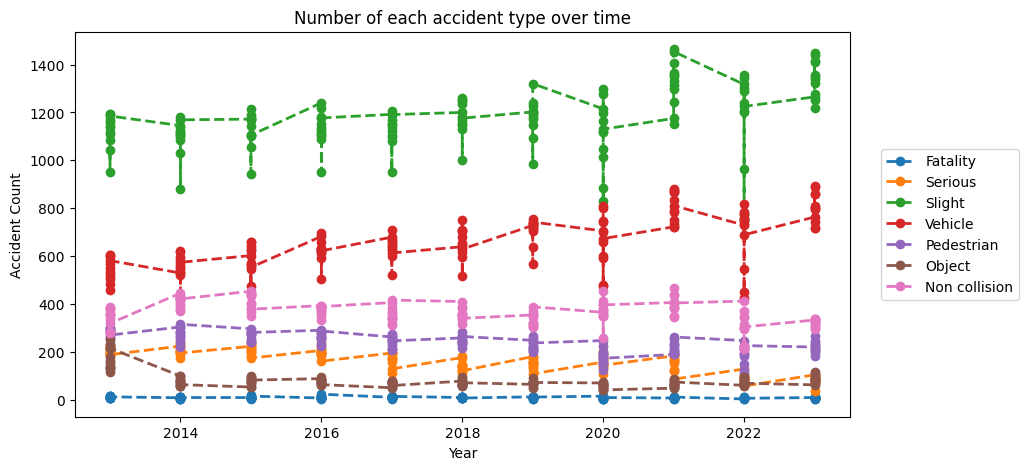

In [468]:
import matplotlib.pyplot as plt

# Define the accident types 
accident_types = ['Fatality', 'Serious', 'Slight', 'Vehicle', 'Pedestrian', 'Object', 'Non collision']

#plot the graph
plt.figure(figsize=(10, 5))

for i, accident_type in enumerate(accident_types):
    plt.plot(df_final['Year'], df_final[accident_type], label=legend_labels[i],marker = 'o', linestyle='--', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Number of each accident type over time')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, ncol=1)
plt.show()

In [479]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select the features (X) and target variable (y)
feature_columns = ['Fatality', 'Serious', 'Slight', 'Vehicle', 'Pedestrian', 'Object', 'Non collision']
X = df_final[feature_columns]  
y = df_final['Total accident']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)



In [477]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#To test whether we can use Linear Regression in this task
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)


MAE:  1.3473995581821158e-13
MSE:  6.127263796689094e-26
RMSE: 2.475331047898259e-13
R2 Score:  1.0


Predicted value of each year from 2020 to 2047
2020: 2682.0
2021: 2878.0
2022: 2732.0
2023: 2698.0
2024: 2832.0
2025: 2876.0000000000005
2026: 2540.0
2027: 2988.0000000000005
2028: 2646.0000000000005
2029: 2648.0
2030: 2644.0000000000005
2031: 2596.0
2032: 2722.0
2033: 2678.0
2034: 2874.0000000000005
2035: 2962.0000000000005
2036: 2906.0
2037: 2728.0
2038: 2848.0
2039: 2558.0000000000005
2040: 2766.0
2041: 2750.0
2042: 2632.0
2043: 2770.0
2044: 2896.0
2045: 2668.0000000000005
2046: 2792.0


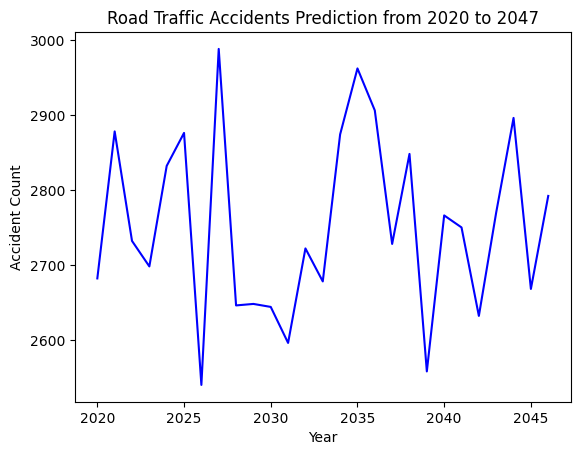

In [476]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a range of future years from 2024 to 2047
future_years = range(2020, 2047)

# Create a DataFrame to hold the predicted and actual values along with the years
data = pd.DataFrame({'Year': future_years,'Actual': y_test, 'Predicted': y_pred})

# Set the 'Year' column as the index
data.set_index('Year', inplace=True)

plt.plot(data.index, data['Predicted'], label='Predicted',color = 'blue')

# Set the plot title and labels
plt.title('Road Traffic Accidents Prediction from 2020 to 2047')
plt.xlabel('Year')
plt.ylabel('Accident Count')

print("Predicted value of each year from 2020 to 2047")
for year,y in zip(future_years,y_pred):
    print(f"{year}: {y}")
    
# Display the plot
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#DATA TRAINING FOR SLIGHT ACCIDENT
# Select the features (X) and target variable (y)
feature_columns = ['Fatality', 'Serious', 'Slight', 'Vehicle', 'Pedestrian', 'Object', 'Non collision']
X2 = df_final[feature_columns]  
y2 = df_final['Slight']  

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create and fit the linear regression model
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred2 = lr_model.predict(X_test2)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#DATA TRAINING FOR VEHICE ACCIDENT
# Select the features (X) and target variable (y)
feature_columns = ['Fatality', 'Serious', 'Slight', 'Vehicle', 'Pedestrian', 'Object', 'Non collision']
X3 = df_final[feature_columns]  
y3 = df_final['Vehicle']  

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Create and fit the linear regression model
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred3 = lr_model.predict(X_test3)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#DATA TRAINING FOR NON COLLISION ACCIDENT
# Select the features (X) and target variable (y)
feature_columns = ['Fatality', 'Serious', 'Slight', 'Vehicle', 'Pedestrian', 'Object', 'Non collision']
X4 = df_final[feature_columns]  
y4 = df_final['Non collision']  

# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Create and fit the linear regression model
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train4, y_train4)

# Make predictions on the test data
y_pred4 = lr_model.predict(X_test4)

Predicted value of Slight accident from 2020 to 2047
2020: 1167.0000000000002
2021: 1320.0000000000005
2022: 1122.0
2023: 1143.0000000000002
2024: 1240.0
2025: 1343.0
2026: 1082.0000000000002
2027: 1411.0000000000005
2028: 1165.0000000000002
2029: 1103.0000000000002
2030: 1100.0000000000002
2031: 1054.0000000000002
2032: 1177.0000000000002
2033: 1142.0000000000005
2034: 1245.0000000000005
2035: 1313.0000000000002
2036: 1240.0000000000002
2037: 1199.0000000000005
2038: 1179.0
2039: 1148.0000000000002
2040: 1180.0000000000002
2041: 1169.0000000000005
2042: 1108.0000000000002
2043: 1185.0000000000002
2044: 1317.0000000000002
2045: 1182.0000000000005
2046: 1321.0
Predicted value of Vehicle accident from 2020 to 2047
2020: 708.0000000000001
2021: 742.0000000000002
2022: 621.0000000000002
2023: 631.0000000000002
2024: 731.0000000000001
2025: 776.0000000000002
2026: 641.0000000000001
2027: 861.0000000000002
2028: 678.0000000000001
2029: 563.0000000000001
2030: 614.0000000000001
2031: 547.0
20

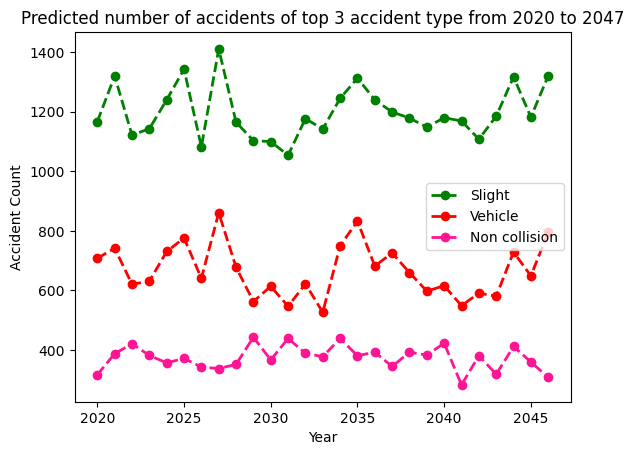

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a range of future years from 2024 to 2047
future_years = range(2020, 2047)

# Create a DataFrame to hold the predicted and actual values along with the years
data = pd.DataFrame({'Year': future_years,'Actual': y_test, 'Predicted': y_pred})

# Set the 'Year' column as the index
data.set_index('Year', inplace=True)

plt.plot(data.index, y_pred2, label='Slight',color = 'green',marker = 'o', linestyle='--', linewidth=2)
plt.plot(data.index, y_pred3, label='Vehicle',color = 'red', marker = 'o', linestyle='--', linewidth=2)
plt.plot(data.index, y_pred4, label='Non collision',color = 'deeppink', marker = 'o', linestyle='--', linewidth=2)

# Set the plot title and labels
plt.title('Predicted number of accidents of top 3 accident type from 2020 to 2047')
plt.xlabel('Year')
plt.ylabel('Accident Count')

print("Predicted value of Slight accident from 2020 to 2047")
for year,y in zip(future_years,y_pred2):
    print(f"{year}: {y}")
print("Predicted value of Vehicle accident from 2020 to 2047")
for year,y in zip(future_years,y_pred3):
    print(f"{year}: {y}")
print("Predicted value of Non collision accident from 2020 to 2047")
for year,y in zip(future_years,y_pred4):
    print(f"{year}: {y}")
    
# Display the plot
plt.legend()
plt.show()
